<a href="https://colab.research.google.com/github/phatlt17420/Python_BA/blob/master/DoAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Cell 2: Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Autoregressive
from statsmodels.genmod.families import Gaussian
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
### asdas

# Cấu hình hiển thị cho đẹp
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore') # Tắt cảnh báo đỏ cho gọn

In [ ]:
df = pd.read_excel("Dataset.xlsx")
df

,YEAR,BANK,CUS,ROA,ROE,NIM,DEP,CASH,LGAP,NPL,SIZE,CR3,VCSH,RRTD,GDP,INF
0,2018,ABB,ABB2018,0.008194,0.110093,0.032627,0.761632,0.139490,-0.190148,0.023422,18.284294,0.437586,0.074426,0.006374,0.070758,0.035394
1,2009,ABB,ABB2009,0.015578,0.073807,0.043999,0.742687,0.462718,-0.198323,0.024272,16.811548,0.443493,0.211059,0.007698,0.053979,0.070546
2,2017,ABB,ABB2017,0.006161,0.081738,0.037870,0.780668,0.197173,-0.222004,0.027180,18.189219,0.452310,0.075381,0.011413,0.068122,0.035203
3,2010,ABB,ABB2010,0.015376,0.108547,0.047665,0.788100,0.298168,-0.242703,0.013691,17.289552,0.402135,0.141657,0.005776,0.064232,0.088616
4,2011,ABB,ABB2011,0.007719,0.065501,0.065404,0.747739,0.232049,-0.243431,0.019986,17.498845,0.383013,0.117843,0.029036,0.062403,0.186755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2013,VPB,VPB2013,0.009088,0.131702,0.059327,0.732269,0.135112,-0.311674,0.028029,18.533730,0.414936,0.064464,0.023214,0.054219,0.065923
317,2012,VPB,VPB2012,0.006937,0.095899,0.049344,0.701148,0.311961,-0.314903,0.023484,18.345370,0.418736,0.068496,0.012231,0.052474,0.090942
318,2017,VTB,VTB2017,0.006710,0.078832,0.023821,0.878382,0.135369,-0.146414,0.014735,17.482040,0.452310,0.081758,0.001782,0.068122,0.035203
319,2018,VTB,VTB2018,0.006909,0.071444,0.027318,0.865519,0.181519,-0.164647,0.013055,17.657171,0.437586,0.084073,0.002491,0.070758,0.035394


In [ ]:
df.describe(include='all')

,YEAR,BANK,CUS,ROA,ROE,NIM,DEP,CASH,LGAP,NPL,SIZE,CR3,VCSH,RRTD,GDP,INF
count,321.000000,321,321,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,3.210000e+02,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
unique,NaN,31,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ABB,VTB2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.074766,NaN,NaN,0.009021,0.084573,0.038600,0.750049,0.220640,-0.206748,2.231160e-02,18.003507,0.433995,0.105141,0.010970,0.061104,0.079406
std,3.133591,NaN,NaN,0.008355,0.080519,0.016937,0.080868,0.126600,0.122962,1.252841e-02,1.232005,0.032109,0.051797,0.009056,0.005912,0.063837
min,2008.000000,NaN,NaN,-0.059929,-0.820021,-0.015160,0.429914,0.047361,-0.698198,5.802364e-08,14.497839,0.383013,0.033521,-0.013367,0.052474,0.008786
25%,2010.000000,NaN,NaN,0.004248,0.035571,0.027817,0.694157,0.132856,-0.283034,1.400164e-02,17.043560,0.414936,0.071142,0.005068,0.054219,0.035203
50%,2013.000000,NaN,NaN,0.007743,0.077741,0.036403,0.757334,0.188523,-0.214794,2.087028e-02,18.056905,0.437586,0.089842,0.008486,0.062108,0.065923
75%,2016.000000,NaN,NaN,0.013239,0.127940,0.047384,0.812826,0.297587,-0.137525,2.759999e-02,18.921398,0.447359,0.127655,0.015015,0.066793,0.090942


In [4]:
# Đổi tên và sắp xếp (Quan trọng cho FGLS)
if 'INF' in df.columns:
    df.rename(columns={'INF': 'INFLATION'}, inplace=True)
df = df.sort_values(by=['BANK', 'YEAR'])

# Tạo biến Dummy (cho ML)
df_encoded = pd.get_dummies(df, columns=['BANK'], drop_first=True)

# Danh sách toàn bộ biến tiềm năng
all_features = ['SIZE', 'NPL', 'DEP', 'CASH', 'INFLATION', 'GDP', 'CR3', 'LGAP', 'VCSH', 'RRTD']

print("Đã tải dữ liệu thành công!")
display(df.head()) # Hiển thị 5 dòng đầu

Đã tải dữ liệu thành công!


,YEAR,BANK,CUS,ROA,ROE,NIM,DEP,CASH,LGAP,NPL,SIZE,CR3,VCSH,RRTD,GDP,INFLATION
8,2008,ABB,ABB2008,0.003241,0.015446,0.024230,0.726701,0.209523,-0.334538,0.027774,16.545591,0.517284,0.209817,0.003774,0.056618,0.231163
1,2009,ABB,ABB2009,0.015578,0.073807,0.043999,0.742687,0.462718,-0.198323,0.024272,16.811548,0.443493,0.211059,0.007698,0.053979,0.070546
3,2010,ABB,ABB2010,0.015376,0.108547,0.047665,0.788100,0.298168,-0.242703,0.013691,17.289552,0.402135,0.141657,0.005776,0.064232,0.088616
4,2011,ABB,ABB2011,0.007719,0.065501,0.065404,0.747739,0.232049,-0.243431,0.019986,17.498845,0.383013,0.117843,0.029036,0.062403,0.186755
6,2012,ABB,ABB2012,0.009121,0.082984,0.057675,0.709766,0.302055,-0.263011,0.028479,17.594638,0.418736,0.109911,0.008987,0.052474,0.090942


In [5]:
# Cell 4: Chạy FGLS để lọc biến
def run_fgls(target_col):
    print(f"--- ĐANG PHÂN TÍCH: {target_col} ---")
    formula = f"{target_col} ~ {' + '.join(all_features)}"

    # Mô hình GEE với cấu trúc tự tương quan AR(1)
    model = GEE.from_formula(formula, groups='BANK', data=df,
                             cov_struct=Autoregressive(), family=Gaussian())
    res = model.fit()

    # Lọc biến có P-value < 0.1
    p_values = res.pvalues
    sig_vars = p_values[(p_values < 0.1) & (p_values.index != 'Intercept')].index.tolist()

    print(f"Các biến có ý nghĩa thống kê (P<0.1): {sig_vars}")
    return sig_vars, res

# Chạy thực tế
sig_vars_roa, res_roa = run_fgls('ROA')
sig_vars_roe, res_roe = run_fgls('ROE')

print("\n--- KẾT QUẢ ---")
print(f"Biến chọn cho ROA: {sig_vars_roa}")
print(f"Biến chọn cho ROE: {sig_vars_roe}")

--- ĐANG PHÂN TÍCH: ROA ---
Các biến có ý nghĩa thống kê (P<0.1): ['SIZE', 'NPL', 'LGAP', 'VCSH']
--- ĐANG PHÂN TÍCH: ROE ---
Các biến có ý nghĩa thống kê (P<0.1): ['SIZE', 'NPL', 'LGAP']

--- KẾT QUẢ ---
Biến chọn cho ROA: ['SIZE', 'NPL', 'LGAP', 'VCSH']
Biến chọn cho ROE: ['SIZE', 'NPL', 'LGAP']


In [6]:
# Cell 5: Huấn luyện Random Forest
def train_rf(target_col, selected_vars):
    # Lấy thêm các cột Bank dummy
    bank_cols = [c for c in df_encoded.columns if c.startswith('BANK_')]
    X = df_encoded[selected_vars + bank_cols]
    y = df_encoded[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)

    # Đánh giá nhanh
    score = r2_score(y_test, rf.predict(X_test))
    print(f"Mô hình {target_col}: Độ chính xác (R2) = {score:.2%}")
    return rf

# Huấn luyện 2 mô hình
rf_roa = train_rf('ROA', sig_vars_roa)
rf_roe = train_rf('ROE', sig_vars_roe)

Mô hình ROA: Độ chính xác (R2) = 39.45%
Mô hình ROE: Độ chính xác (R2) = 51.06%


In [7]:
# Cell 6: Chạy Mô phỏng (Bạn hãy sửa số liệu ở đây)

# --- CẤU HÌNH KỊCH BẢN ---
NGAN_HANG_MUC_TIEU = 'VCB'  # Thử đổi thành 'VPB', 'BID', 'CTG'...

# Bạn muốn thay đổi gì? (Giữ nguyên các số khác)
THAY_DOI = {
    'NPL': 0.015,   # Giả sử Nợ xấu giảm xuống 1.5%
    'VCSH': 0.12,   # Giả sử Vốn chủ sở hữu tăng lên 12%
    'SIZE': 20.0    # Giả sử Quy mô mở rộng lên mức 20
}
# -------------------------

def simulate(bank_name, scenarios):
    print(f"DỰ BÁO CHO: {bank_name}")
    try:
        # Lấy dữ liệu nền mới nhất của ngân hàng này
        bank_cols = [c for c in df_encoded.columns if c.startswith('BANK_')]
        base_data = df_encoded[df_encoded[f'BANK_{bank_name}'] == 1].iloc[[-1]].copy()
    except:
        print("Không tìm thấy tên ngân hàng này!")
        return

    # Áp dụng thay đổi
    for var, val in scenarios.items():
        if var in base_data.columns:
            print(f"- Điều chỉnh {var}: {base_data[var].values[0]:.4f} -> {val:.4f}")
            base_data[var] = val

    # Dự báo
    cols_roa = sig_vars_roa + bank_cols
    pred_roa = rf_roa.predict(base_data[cols_roa])[0]

    cols_roe = sig_vars_roe + bank_cols
    pred_roe = rf_roe.predict(base_data[cols_roe])[0]

    print(f"\n>> KẾT QUẢ DỰ BÁO:")
    print(f"   ROA: {pred_roa:.4f} ({pred_roa*100:.2f}%)")
    print(f"   ROE: {pred_roe:.4f} ({pred_roe*100:.2f}%)")

# Chạy hàm
simulate(NGAN_HANG_MUC_TIEU, THAY_DOI)

DỰ BÁO CHO: VCB
- Điều chỉnh NPL: 0.0107 -> 0.0150
- Điều chỉnh VCSH: 0.0544 -> 0.1200
- Điều chỉnh SIZE: 20.7765 -> 20.0000

>> KẾT QUẢ DỰ BÁO:
   ROA: 0.0133 (1.33%)
   ROE: 0.1552 (15.52%)


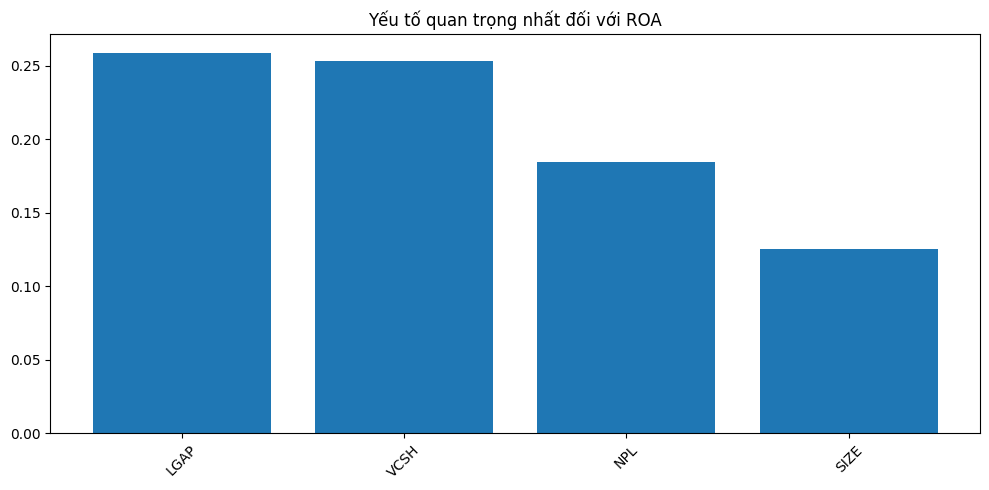

In [8]:
# Cell 7: Vẽ biểu đồ Feature Importance
def plot_importance(model, feature_names, title):
    importances = model.feature_importances_[:len(feature_names)]
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title(f"Yếu tố quan trọng nhất đối với {title}")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

# Vẽ cho ROA
plot_importance(rf_roa, sig_vars_roa, "ROA")